Nama : Indra setiawan<br>
Nim : 211351066<br>
Kelas : Pagi B<br>
UAS : K-Means

#Import Dataset

In [169]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"indrast19","key":"d1b80b1f8adbcad673036a22fde4c157"}'}

In [170]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [171]:
!kaggle datasets download -d utkarshx27/starbucks-nutrition

starbucks-nutrition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [172]:
!mkdir starbucks-nutrition
!unzip starbucks-nutrition.zip -d starbucks-nutrition
!ls starbucks-nutrition

mkdir: cannot create directory ‘starbucks-nutrition’: File exists
Archive:  starbucks-nutrition.zip
replace starbucks-nutrition/starbucks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: starbucks.csv


#Import libary yang digunakan

In [173]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#Data Discovery

In [174]:
df = pd.read_csv('/content/starbucks-nutrition/starbucks.csv')

In [175]:
#Ini adalah data - data kandungan nutrion starbuck
df.head()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [176]:
df.describe()

,Unnamed: 0,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,338.831169,13.766234,44.870130,2.220779,9.480519
std,22.371857,105.368701,7.095488,16.551634,2.112764,8.079556
min,1.000000,80.000000,0.000000,16.000000,0.000000,0.000000
25%,20.000000,300.000000,9.000000,31.000000,0.000000,5.000000
50%,39.000000,350.000000,13.000000,45.000000,2.000000,7.000000
75%,58.000000,420.000000,18.000000,59.000000,4.000000,15.000000
max,77.000000,500.000000,28.000000,80.000000,7.000000,34.000000


In [177]:
#Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77 non-null     int64  
 1   item        77 non-null     object 
 2   calories    77 non-null     int64  
 3   fat         77 non-null     float64
 4   carb        77 non-null     int64  
 5   fiber       77 non-null     int64  
 6   protein     77 non-null     int64  
 7   type        77 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.9+ KB


In [178]:
#Melihat apakah ada data yang bermasalah
df.isnull().sum()

Unnamed: 0    0
item          0
calories      0
fat           0
carb          0
fiber         0
protein       0
type          0
dtype: int64

#EDA

lanjut dengan meng-visualisasikan data yang nantinya akan melewati tahap preprocessing.

<Axes: >

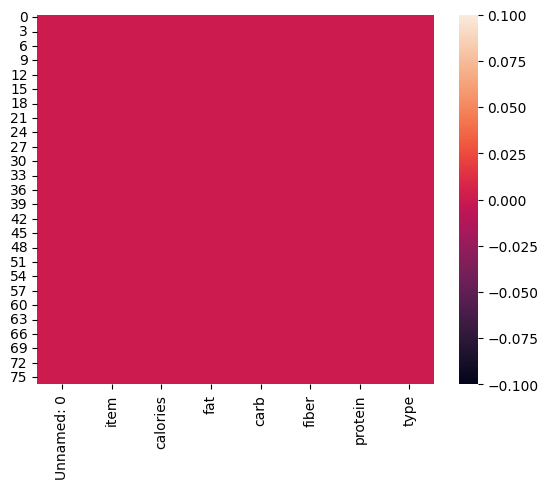

In [179]:
sns.heatmap(df.isnull())

<ipython-input-180-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

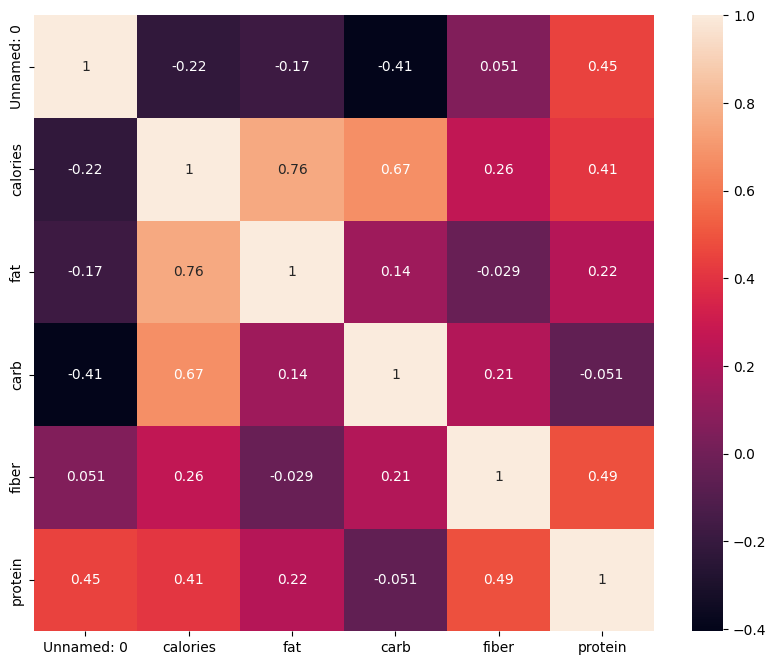

In [180]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Calories in Items')

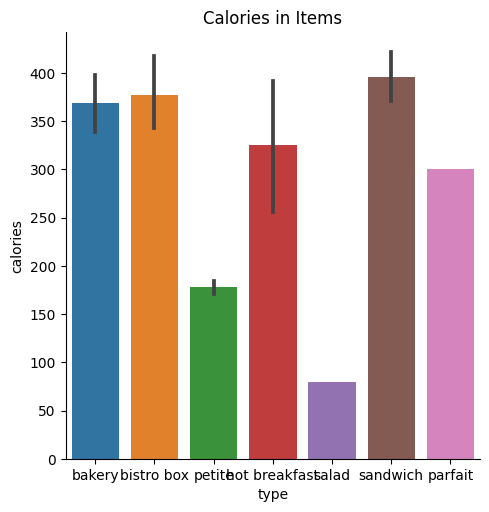

In [181]:
sns.catplot(kind='bar',x='type',y='calories',data=df)
plt.title('Calories in Items')

sandwich mengandung calories paling tinggi

Text(0.5, 1.0, 'Fats in Items')

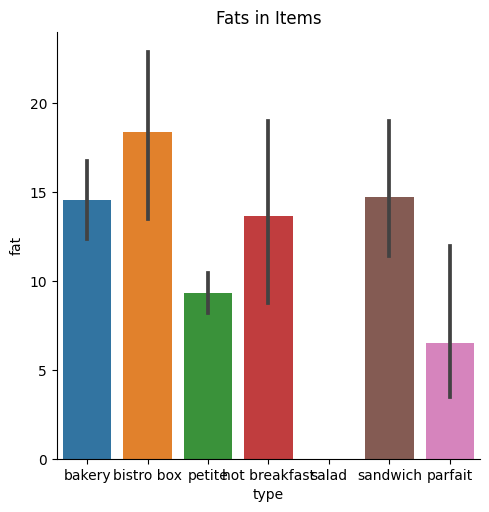

In [182]:
sns.catplot(kind='bar',x='type',y='fat',data=df)
plt.title('Fats in Items')

disini bistro box mengandung fat paling banyak

Text(0.5, 1.0, 'Protein in Items')

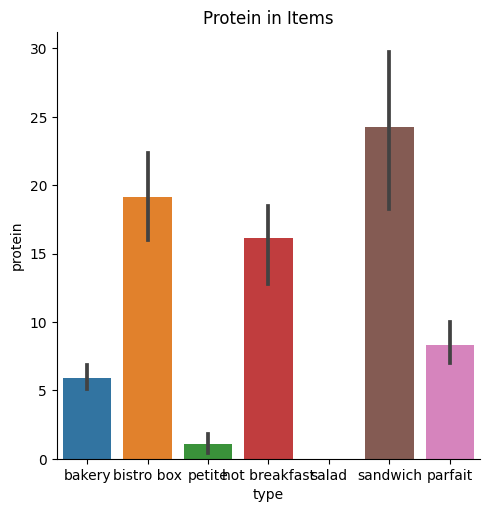

In [183]:
sns.catplot(kind='bar',x='type',y='protein',data=df)
plt.title('Protein in Items')

yang paling banyak menganduk protein ada di sandwich

Text(0.5, 1.0, 'Fibers in Items')

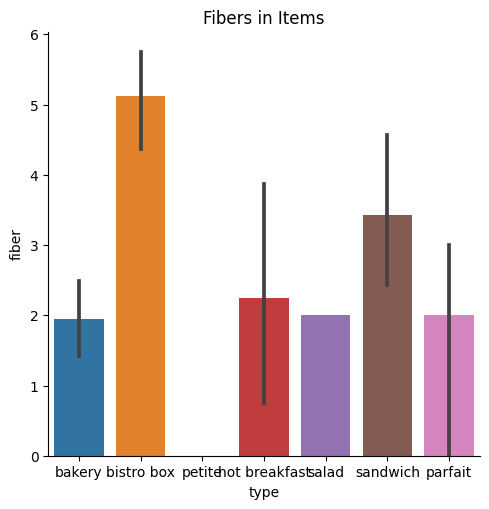

In [184]:
sns.catplot(kind='bar',x='type',y='fiber',data=df)
plt.title('Fibers in Items')

wow disini bisto box mengandung fibers paling tinggi di antara lainnya

#Preprocessing

Disini kita akan drop(menghapus) data Unnamed: 0,item dan mengubah data type menjadi int

In [185]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [186]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77 non-null     int64  
 1   item        77 non-null     object 
 2   calories    77 non-null     int64  
 3   fat         77 non-null     float64
 4   carb        77 non-null     int64  
 5   fiber       77 non-null     int64  
 6   protein     77 non-null     int64  
 7   type        77 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 4.9+ KB


Data type sudah berubah menjadi int

In [188]:
x = df.drop(['Unnamed: 0','item'], axis=1)

In [189]:
print(x)

    calories   fat  carb  fiber  protein  type
0        350   8.0    67      5       10     0
1        350   9.0    64      7        6     0
2        420  20.0    59      0        5     0
3        490  19.0    75      4        7     0
4        130   6.0    17      0        0     0
..       ...   ...   ...    ...      ...   ...
72       420  13.0    46      6       32     6
73       390  13.0    36      2       34     6
74       300  12.0    44      0        8     3
75       300   4.0    57      3       10     3
76       300   3.5    60      3        7     3

[77 rows x 6 columns]


Berhasil mengahapus data unnamed: 0 dan item

Lalu kita cari elbownya

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

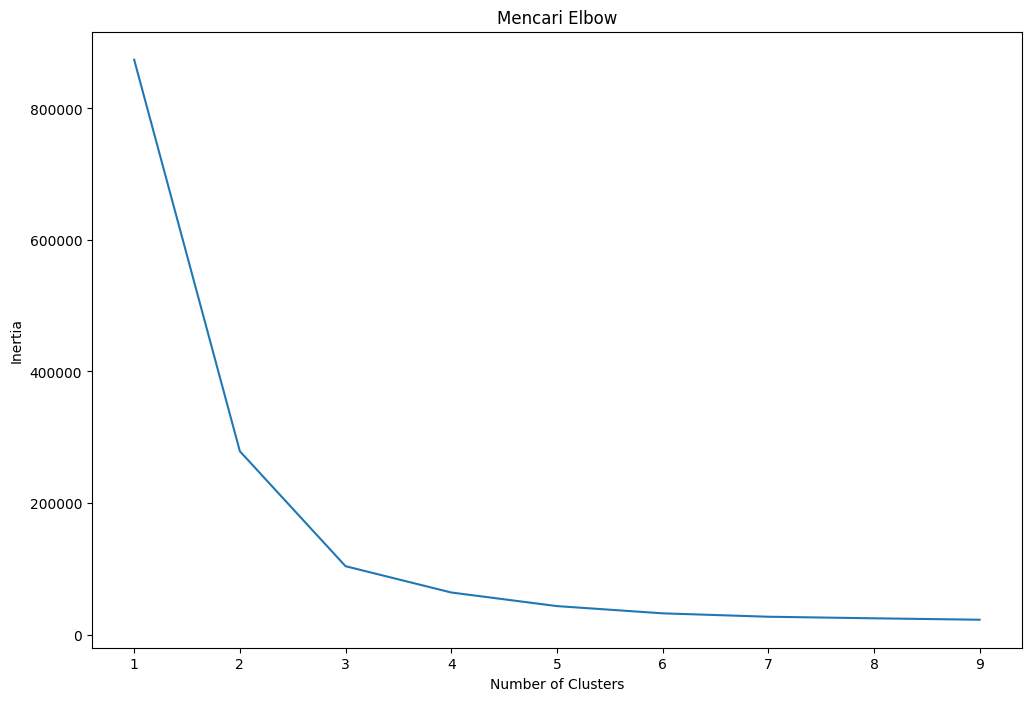

In [190]:
clusters = []
for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

kita telah menemukan angka 2 dan 3 sebagai elbownya, lalu kita gunakan angka 3 sebagai K

#Modeling

Disini kita akan mengelompokan data(cluster)

In [191]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust).fit(x)
x['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


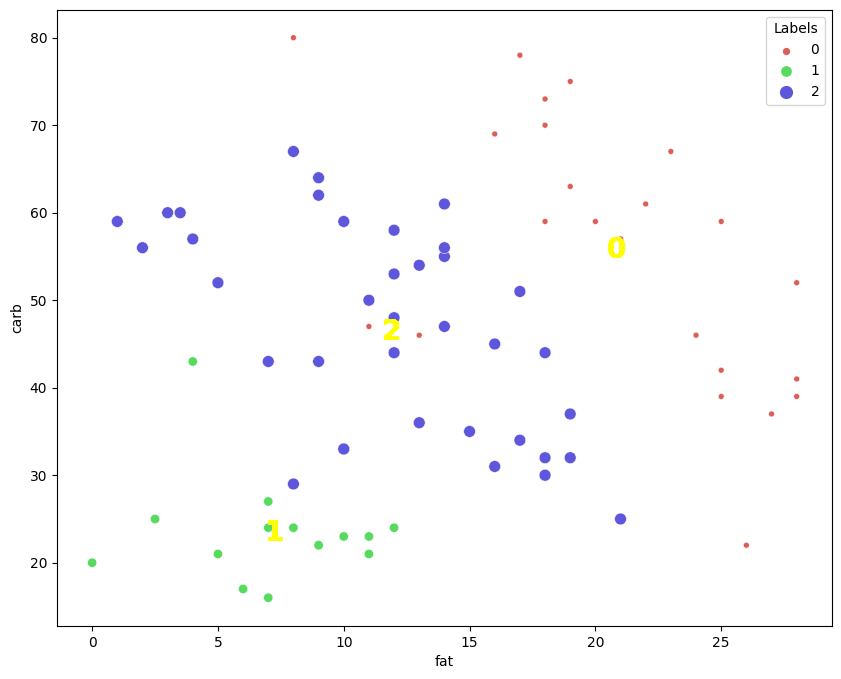

In [192]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='fat', y='carb', hue='Labels', size='Labels', markers=True, palette=sns.color_palette('hls', n_colors=n_clust), data=x)

for label in x['Labels']:
    plt.annotate(label,
                 (x[x['Labels'] == label]['fat'].mean(),
                  x[x['Labels'] == label]['carb'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='yellow')

plt.show()

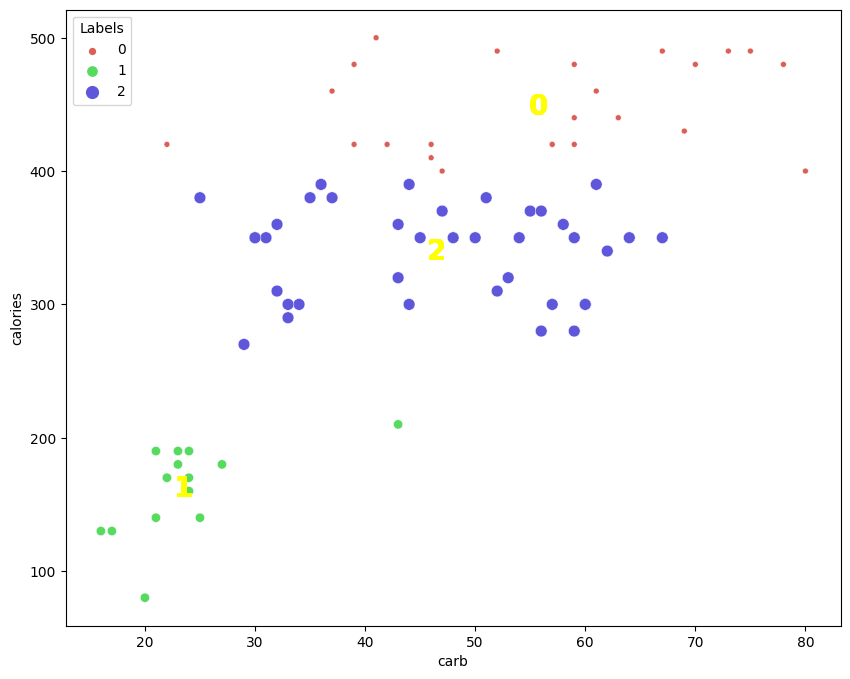

In [193]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='carb', y='calories', hue='Labels', size='Labels', markers=True, palette=sns.color_palette('hls', n_colors=n_clust), data=x)

for label in x['Labels']:
    plt.annotate(label,
                 (x[x['Labels'] == label]['carb'].mean(),
                  x[x['Labels'] == label]['calories'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='yellow')

plt.show()

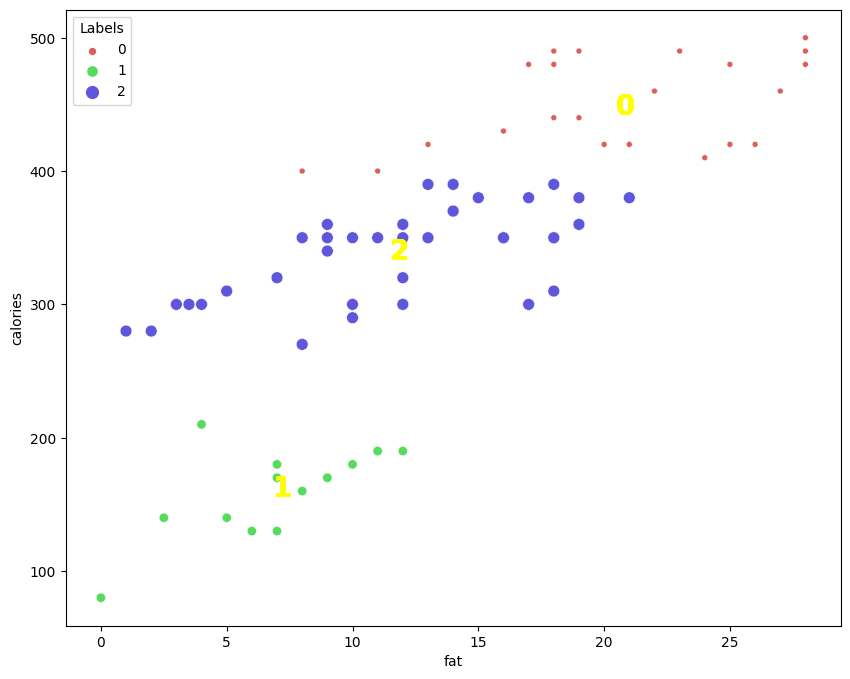

In [194]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='fat', y='calories', hue='Labels', size='Labels', markers=True, palette=sns.color_palette('hls', n_colors=n_clust), data=x)

for label in x['Labels']:
    plt.annotate(label,
                 (x[x['Labels'] == label]['fat'].mean(),
                  x[x['Labels'] == label]['calories'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='yellow')

plt.show()

Data-datanya sudah kita cluster/kelompokkan

Lalu kita lihat data

In [195]:
print(x)

    calories   fat  carb  fiber  protein  type  Labels
0        350   8.0    67      5       10     0       2
1        350   9.0    64      7        6     0       2
2        420  20.0    59      0        5     0       0
3        490  19.0    75      4        7     0       0
4        130   6.0    17      0        0     0       1
..       ...   ...   ...    ...      ...   ...     ...
72       420  13.0    46      6       32     6       0
73       390  13.0    36      2       34     6       2
74       300  12.0    44      0        8     3       2
75       300   4.0    57      3       10     3       2
76       300   3.5    60      3        7     3       2

[77 rows x 7 columns]


#Exporting dengan pickle

In [196]:
import pickle

with open("model.pkl", "wb") as mod:
    pickle.dump(kmean, mod)

file pickle berhasil di export